In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read the dataset
df = pd.read_csv('/Users/priyakundu/Documents/NYU Capstone WaterVue Files/Sample_Dataset.csv')
df

,Site #,Location,Sample Date,Analysis code,Analysis,DQC,Result,Units,Detection Limit
0,1.0,#1 HILLSBORO CANAL US 1,2/22/06,Chl a,Chlorophyll a,NaN,12.100,mg/m3,0.955
1,1.0,#1 HILLSBORO CANAL US 1,2/22/06,Conductivity,Specific Conductance,NaN,31300.000,umho/cm,1.000
2,1.0,#1 HILLSBORO CANAL US 1,2/22/06,DO,Dissolved Oxygen,NaN,6.980,mg/L,0.050
3,1.0,#1 HILLSBORO CANAL US 1,2/22/06,Sal,Salinity,NaN,19.400,ppt,0.025
4,1.0,#1 HILLSBORO CANAL US 1,2/22/06,TN,Total Nitrogen,NaN,0.830,mg/L,0.107
...,...,...,...,...,...,...,...,...,...
19395,129.0,#129 Taft Street,11/15/21,Sal,Salinity,NaN,1.230,ppt,0.025
19396,129.0,#129 Taft Street,11/15/21,TP,Total Phosphorus,I,0.035,mg/L,0.013
19397,129.0,#129 Taft Street,11/15/21,Turbidity,Turbidity,NaN,1.400,NTU,0.080
19398,129.0,#129 Taft Street,11/15/21,TN,Total Nitrogen,NaN,0.821,mg/L,0.049


In [3]:
# Group by "Units" and aggregate "Analysis" values
unique_units_analysis = df.groupby('Units')['Analysis'].unique()

# Print unique values of "Units" with their corresponding values in "Analysis" column
for unit, analysis in unique_units_analysis.items():
    print(f"Units: {unit}, Analysis: {analysis}")

Units: NTU, Analysis: ['Turbidity']
Units: NTU       , Analysis: ['Turbidity' 'Turbidity ']
Units: mg/L, Analysis: ['Dissolved Oxygen' 'Total Nitrogen' 'Total Phosphorus' 'Chlorophyll a']
Units: mg/m3, Analysis: ['Chlorophyll a' 'Copper' 'Chlorophyll A']
Units: ppt, Analysis: ['Salinity']
Units: ug/L, Analysis: ['Chlorophyll a']
Units: umho/cm, Analysis: ['Specific Conductance']
Units: umhos/cm, Analysis: ['Specific Conductance']


In [4]:
# Pivot the dataframe to get unique values from "Analysis" column as columns
df_pivot = df.pivot_table(index=['Site #', 'Location', 'Sample Date'], columns='Analysis', values='Result').reset_index()

# Group by sample date and location
cleaned_df = df_pivot.groupby(['Sample Date', 'Location']).first().reset_index()

# Print the new dataframe
cleaned_df

Analysis,Sample Date,Location,Site #,Chlorophyll A,Chlorophyll a,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity,Turbidity
0,1/30/12,#1 HILLSBORO CANAL US 1,1.0,NaN,2.77,NaN,6.110,24.80,39000.0,0.3600,0.0770,1.70,NaN
1,1/30/12,#11 MIDDLE RIVER NW 21ST AVE,11.0,NaN,5.29,NaN,5.195,5.39,9485.0,0.7025,0.0345,1.00,NaN
2,1/30/12,#110 POMPANO CANAL AT DIXIE AN,110.0,NaN,5.53,NaN,7.130,0.20,424.0,1.1600,0.0330,2.00,NaN
3,1/30/12,#111 S. FORK MID R. @ N.E. 15,111.0,NaN,NaN,NaN,6.170,20.80,33300.0,0.5460,0.0490,1.00,NaN
4,1/30/12,#112 N. FORK MID R. @ N.E. 16,112.0,NaN,NaN,NaN,5.980,21.20,34000.0,0.4840,0.0530,0.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,9/9/19,#2 HILLSBORO LOCK,2.0,NaN,15.00,NaN,6.250,0.29,598.0,1.1763,0.0810,1.80,NaN
3032,9/9/19,#3 HILLSBORO CANAL US 441,3.0,NaN,9.77,NaN,2.120,0.29,605.0,1.3565,0.0680,1.40,NaN
3033,9/9/19,#4 HILLSBORO CANAL SE GROWERS,4.0,NaN,12.50,NaN,4.190,0.34,716.0,1.5725,0.0250,4.50,NaN
3034,9/9/19,#8 POMPANO CANAL US 441,8.0,NaN,1.86,NaN,3.980,0.36,739.0,1.1845,-0.0010,0.60,NaN


In [5]:
# Renaming the columns using indexing
cleaned_df.columns = [*cleaned_df.columns[:-2], 'Turbidity1', 'Turbidity2']

cleaned_df

,Sample Date,Location,Site #,Chlorophyll A,Chlorophyll a,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity1,Turbidity2
0,1/30/12,#1 HILLSBORO CANAL US 1,1.0,NaN,2.77,NaN,6.110,24.80,39000.0,0.3600,0.0770,1.70,NaN
1,1/30/12,#11 MIDDLE RIVER NW 21ST AVE,11.0,NaN,5.29,NaN,5.195,5.39,9485.0,0.7025,0.0345,1.00,NaN
2,1/30/12,#110 POMPANO CANAL AT DIXIE AN,110.0,NaN,5.53,NaN,7.130,0.20,424.0,1.1600,0.0330,2.00,NaN
3,1/30/12,#111 S. FORK MID R. @ N.E. 15,111.0,NaN,NaN,NaN,6.170,20.80,33300.0,0.5460,0.0490,1.00,NaN
4,1/30/12,#112 N. FORK MID R. @ N.E. 16,112.0,NaN,NaN,NaN,5.980,21.20,34000.0,0.4840,0.0530,0.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,9/9/19,#2 HILLSBORO LOCK,2.0,NaN,15.00,NaN,6.250,0.29,598.0,1.1763,0.0810,1.80,NaN
3032,9/9/19,#3 HILLSBORO CANAL US 441,3.0,NaN,9.77,NaN,2.120,0.29,605.0,1.3565,0.0680,1.40,NaN
3033,9/9/19,#4 HILLSBORO CANAL SE GROWERS,4.0,NaN,12.50,NaN,4.190,0.34,716.0,1.5725,0.0250,4.50,NaN
3034,9/9/19,#8 POMPANO CANAL US 441,8.0,NaN,1.86,NaN,3.980,0.36,739.0,1.1845,-0.0010,0.60,NaN


In [6]:
# Merge the "Turbidity1" and "Turbidity2" columns into a single column named "Turbidity1"
cleaned_df['Turbidity'] = cleaned_df['Turbidity1'].combine_first(cleaned_df['Turbidity2'])

# Drop the "old" columns
cleaned_df.drop(columns=['Turbidity1' , 'Turbidity2'], inplace=True)

# Print the cleaned dataframe
cleaned_df

,Sample Date,Location,Site #,Chlorophyll A,Chlorophyll a,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity
0,1/30/12,#1 HILLSBORO CANAL US 1,1.0,NaN,2.77,NaN,6.110,24.80,39000.0,0.3600,0.0770,1.70
1,1/30/12,#11 MIDDLE RIVER NW 21ST AVE,11.0,NaN,5.29,NaN,5.195,5.39,9485.0,0.7025,0.0345,1.00
2,1/30/12,#110 POMPANO CANAL AT DIXIE AN,110.0,NaN,5.53,NaN,7.130,0.20,424.0,1.1600,0.0330,2.00
3,1/30/12,#111 S. FORK MID R. @ N.E. 15,111.0,NaN,NaN,NaN,6.170,20.80,33300.0,0.5460,0.0490,1.00
4,1/30/12,#112 N. FORK MID R. @ N.E. 16,112.0,NaN,NaN,NaN,5.980,21.20,34000.0,0.4840,0.0530,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
3031,9/9/19,#2 HILLSBORO LOCK,2.0,NaN,15.00,NaN,6.250,0.29,598.0,1.1763,0.0810,1.80
3032,9/9/19,#3 HILLSBORO CANAL US 441,3.0,NaN,9.77,NaN,2.120,0.29,605.0,1.3565,0.0680,1.40
3033,9/9/19,#4 HILLSBORO CANAL SE GROWERS,4.0,NaN,12.50,NaN,4.190,0.34,716.0,1.5725,0.0250,4.50
3034,9/9/19,#8 POMPANO CANAL US 441,8.0,NaN,1.86,NaN,3.980,0.36,739.0,1.1845,-0.0010,0.60


In [7]:
# Merge the "Chlorophyll A" and "Chlorophyll a" columns into a single column named "Chlorophyll A"
cleaned_df['Chlorophyll A'] = cleaned_df['Chlorophyll A'].combine_first(cleaned_df['Chlorophyll a'])

# Drop the "Chlorophyll a" column
cleaned_df.drop(columns=['Chlorophyll a'], inplace=True)

# Print the cleaned dataframe
cleaned_df

,Sample Date,Location,Site #,Chlorophyll A,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity
0,1/30/12,#1 HILLSBORO CANAL US 1,1.0,2.77,NaN,6.110,24.80,39000.0,0.3600,0.0770,1.70
1,1/30/12,#11 MIDDLE RIVER NW 21ST AVE,11.0,5.29,NaN,5.195,5.39,9485.0,0.7025,0.0345,1.00
2,1/30/12,#110 POMPANO CANAL AT DIXIE AN,110.0,5.53,NaN,7.130,0.20,424.0,1.1600,0.0330,2.00
3,1/30/12,#111 S. FORK MID R. @ N.E. 15,111.0,NaN,NaN,6.170,20.80,33300.0,0.5460,0.0490,1.00
4,1/30/12,#112 N. FORK MID R. @ N.E. 16,112.0,NaN,NaN,5.980,21.20,34000.0,0.4840,0.0530,0.90
...,...,...,...,...,...,...,...,...,...,...,...
3031,9/9/19,#2 HILLSBORO LOCK,2.0,15.00,NaN,6.250,0.29,598.0,1.1763,0.0810,1.80
3032,9/9/19,#3 HILLSBORO CANAL US 441,3.0,9.77,NaN,2.120,0.29,605.0,1.3565,0.0680,1.40
3033,9/9/19,#4 HILLSBORO CANAL SE GROWERS,4.0,12.50,NaN,4.190,0.34,716.0,1.5725,0.0250,4.50
3034,9/9/19,#8 POMPANO CANAL US 441,8.0,1.86,NaN,3.980,0.36,739.0,1.1845,-0.0010,0.60


In [8]:
# Find null values in the DataFrame
null_values = cleaned_df.isnull()

# Count null values in each column
null_counts = null_values.sum()

print("Null values in each column:")
print(null_counts)

Null values in each column:
Sample Date                0
Location                   0
Site #                     0
Chlorophyll A            336
Copper                  2554
Dissolved Oxygen         379
Salinity                 379
Specific Conductance     376
Total Nitrogen           910
Total Phosphorus         748
Turbidity                303
dtype: int64


In [9]:
# # Drop rows with null values
# cleaned_df = cleaned_df.dropna()

# Print dataframe
# cleaned_df

In [10]:
sorted_df = cleaned_df.sort_values(by='Site #', ascending=True)
sorted_df

,Sample Date,Location,Site #,Chlorophyll A,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity
0,1/30/12,#1 HILLSBORO CANAL US 1,1.0,2.77,NaN,6.11,24.800,39000.0,0.3600,0.077,1.70
1177,2/29/16,#1 HILLSBORO CANAL US 1,1.0,3.55,NaN,7.11,0.310,659.0,NaN,0.046,1.90
1293,3/2/09,#1 HILLSBORO CANAL US 1,1.0,4.89,NaN,6.46,29.200,45100.0,0.5900,NaN,2.40
1385,3/6/17,#1 HILLSBORO CANAL US 1,1.0,9.03,NaN,4.06,24.400,38100.0,NaN,NaN,2.00
1404,3/6/19,#1 HILLSBORO CANAL US 1,1.0,7.70,NaN,6.19,17.000,24400.0,0.6402,0.127,3.90
...,...,...,...,...,...,...,...,...,...,...,...
670,12/16/20,#129 Taft Street,129.0,2.83,NaN,4.10,2.710,5010.0,1.0186,0.037,0.55
1338,3/3/21,#129 Taft Street,129.0,5.35,NaN,4.47,9.170,15700.0,1.0800,0.079,0.85
2544,8/23/21,#129 Taft Street,129.0,26.40,NaN,7.69,9.170,14700.0,0.7080,0.075,1.60
3021,9/6/19,#129 Taft Street,129.0,5.66,NaN,3.72,0.704,1420.0,1.0054,0.029,0.80


In [11]:
# Specify the path where you want to save the CSV file
csv_file_path = 'Clean_Dataframe_WaterQual.csv'

# Convert DataFrame to CSV
sorted_df.to_csv(csv_file_path, index=False)

### Some Exploratory Data Analysis

In [12]:
# Compute basic summary statistics
summary_stats = sorted_df.describe()
summary_stats

,Site #,Chlorophyll A,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity
count,3036.000000,2700.000000,482.000000,2657.000000,2657.000000,2660.000000,2126.000000,2288.000000,2733.000000
mean,40.786891,5.903133,8.380192,5.112770,10.423731,16891.410602,1.003846,0.056434,1.594135
std,37.923339,7.745404,6.134866,1.980203,12.483357,22083.480219,0.465317,0.062370,1.388611
min,1.000000,-0.048000,0.000000,0.320000,0.000000,37.500000,0.000000,-0.147000,0.000000
25%,15.000000,1.830000,4.455000,4.050000,0.310000,639.000000,0.637000,0.020000,0.850000
50%,29.000000,3.390000,6.525000,5.220000,1.860000,3765.000000,1.010000,0.040000,1.300000
75%,40.000000,6.990000,10.418750,6.210000,21.400000,34700.000000,1.360000,0.071000,1.900000
max,129.000000,99.200000,44.200000,61.500000,72.400000,427119.000000,2.515000,0.649000,23.000000


In [13]:
# Convert 'Sample Date' column to datetime format
sorted_df['Sample Date'] = pd.to_datetime(sorted_df['Sample Date'])

# Set 'Sample Date' as the index
sorted_df.set_index('Sample Date', inplace=True)

# Select columns from the 4th column onwards
columns_to_resample = sorted_df.columns[2:]

# Resample each column separately and take means on a yearly basis
resampled_data = {}
for column in columns_to_resample:
    resampled_data[column] = sorted_df[column].resample('Y').mean()

# Convert the dictionary of resampled data to a DataFrame
resampled_df = pd.DataFrame(resampled_data)

# Re-adding the timestamp column to the dataframe
resampled_df["Sample Date"] = resampled_df.index

# Print the resampled Dataframe
resampled_df

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_28955/3398283069.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sorted_df['Sample Date'] = pd.to_datetime(sorted_df['Sample Date'])
/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_28955/3398283069.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled_data[column] = sorted_df[column].resample('Y').mean()


,Chlorophyll A,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity,Sample Date
Sample Date,,,,,,,,,
2006-12-31,7.916875,6.569521,5.845556,10.899019,17320.025974,1.197693,0.040319,1.676765,2006-12-31
2007-12-31,5.758366,6.126213,5.698214,13.075877,20555.100649,1.103004,0.045813,1.762941,2007-12-31
2008-12-31,7.189375,6.320714,5.420905,11.521233,18269.607759,1.189414,0.046108,1.933071,2008-12-31
2009-12-31,6.703846,5.391250,4.863814,10.643554,16892.897436,1.014234,0.041421,1.580937,2009-12-31
2010-12-31,5.201154,6.173646,4.958462,8.858214,14290.600000,1.005843,0.038422,1.463356,2010-12-31
2011-12-31,6.011758,6.543298,5.601494,13.974173,21896.429487,0.917872,0.043218,1.438295,2011-12-31
2012-12-31,4.477190,16.944896,5.395769,12.824163,20074.932692,0.892003,0.043467,1.258075,2012-12-31
2013-12-31,5.581657,13.799783,4.759349,9.554497,14866.260355,1.036112,0.043920,1.691908,2013-12-31
2014-12-31,6.069494,NaN,5.153564,9.224287,19683.787293,1.259804,0.052609,1.622346,2014-12-31


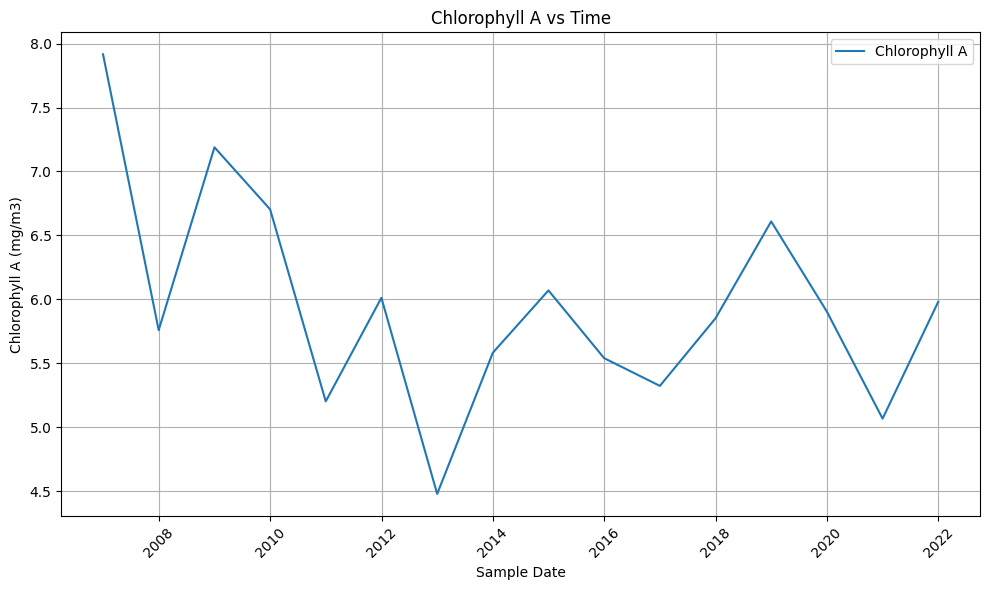

In [14]:
# Plotting Chlorophyll A vs time
plt.figure(figsize=(10, 6))
plt.plot(resampled_df['Sample Date'], resampled_df['Chlorophyll A'], label='Chlorophyll A')
plt.xlabel('Sample Date')
plt.ylabel('Chlorophyll A (mg/m3)')
plt.title('Chlorophyll A vs Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

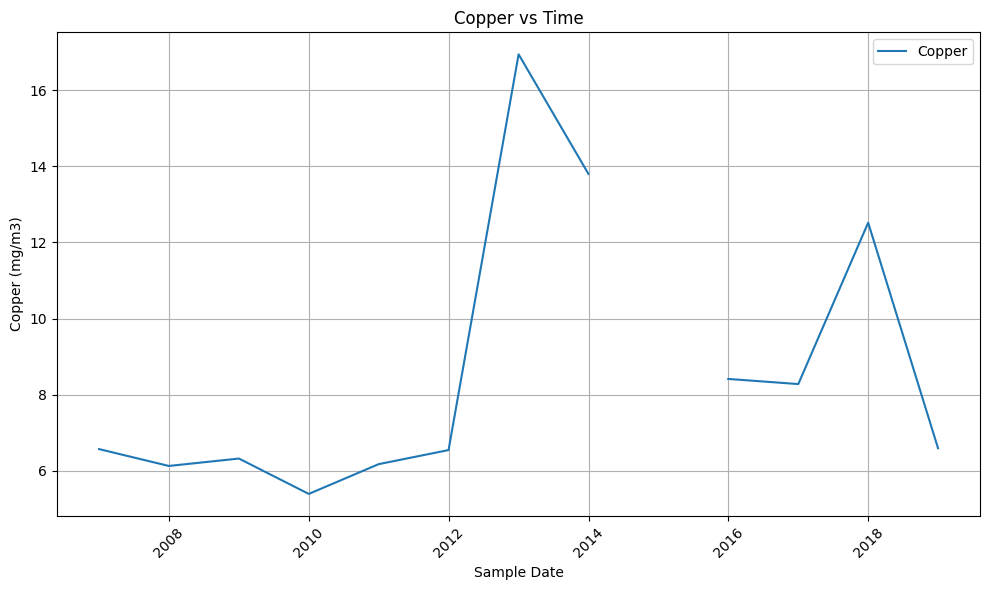

In [15]:
# Plotting Copper vs time
plt.figure(figsize=(10, 6))
plt.plot(resampled_df['Sample Date'], resampled_df['Copper'], label='Copper')
plt.xlabel('Sample Date')
plt.ylabel('Copper (mg/m3)')
plt.title('Copper vs Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

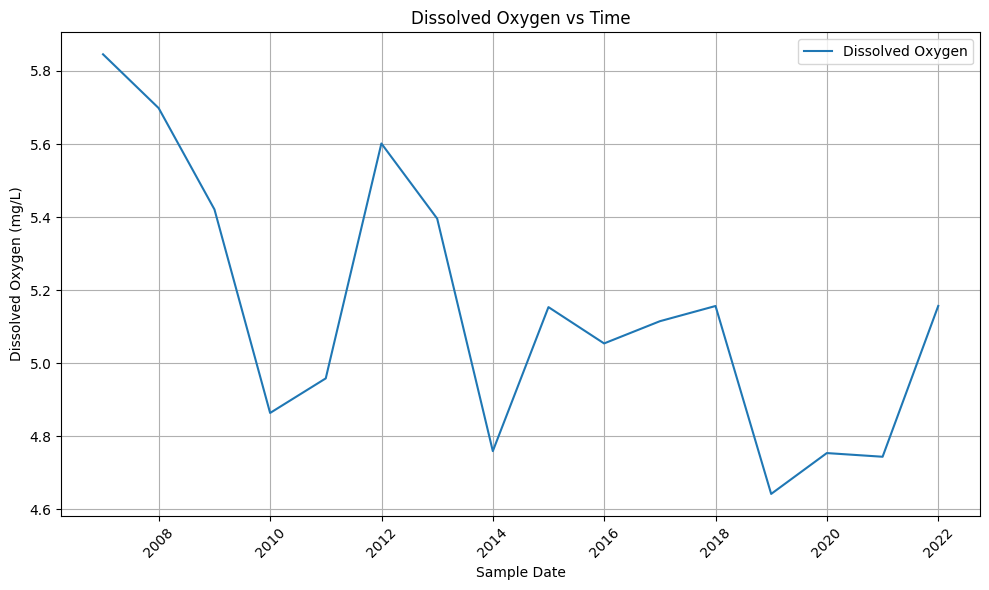

In [16]:
# Plotting Dissolved Oxygen vs time
plt.figure(figsize=(10, 6))
plt.plot(resampled_df['Sample Date'], resampled_df['Dissolved Oxygen'], label='Dissolved Oxygen')
plt.xlabel('Sample Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.title('Dissolved Oxygen vs Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

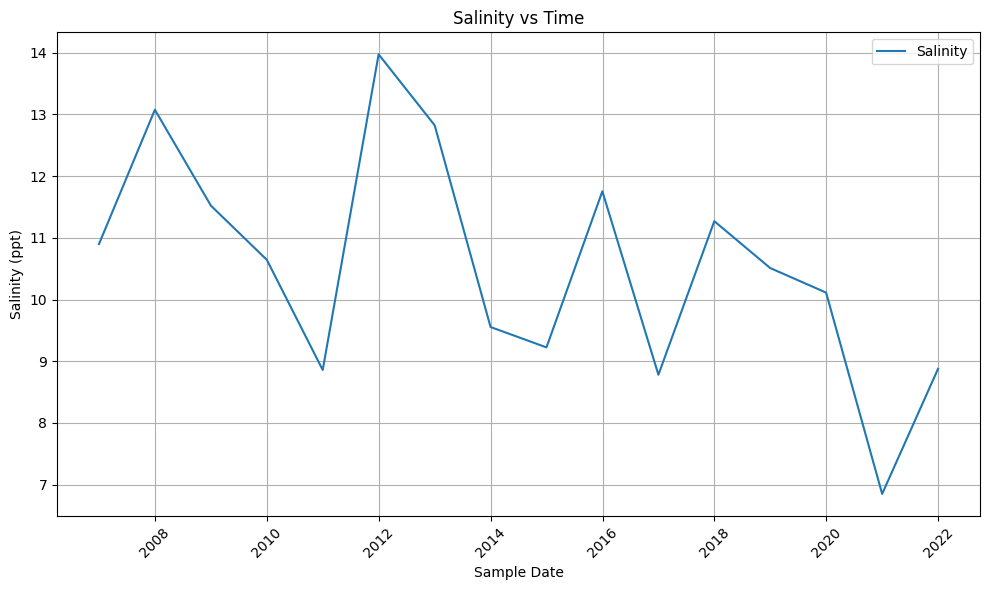

In [17]:
# Plotting Salinity vs time
plt.figure(figsize=(10, 6))
plt.plot(resampled_df['Sample Date'], resampled_df['Salinity'], label='Salinity')
plt.xlabel('Sample Date')
plt.ylabel('Salinity (ppt)')
plt.title('Salinity vs Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

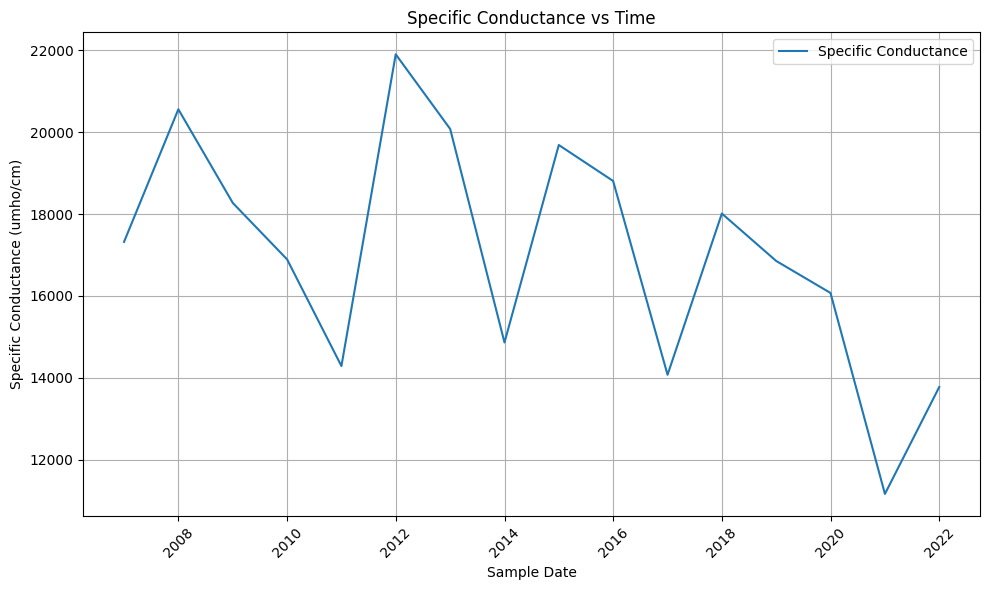

In [18]:
# Plotting Specific Conductance vs time
plt.figure(figsize=(10, 6))
plt.plot(resampled_df['Sample Date'], resampled_df['Specific Conductance'], label='Specific Conductance')
plt.xlabel('Sample Date')
plt.ylabel('Specific Conductance (umho/cm)')
plt.title('Specific Conductance vs Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

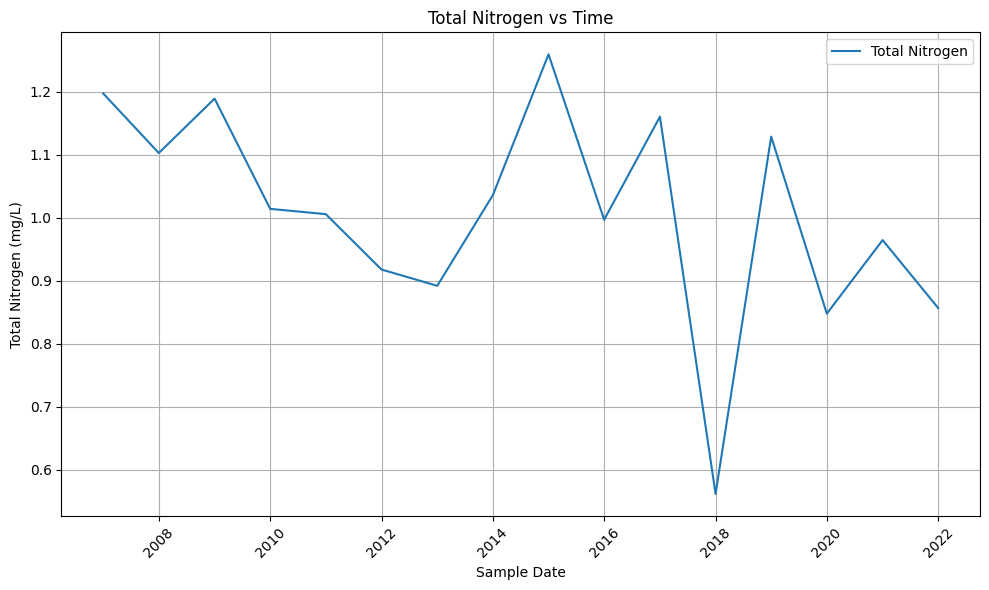

In [19]:
# Plotting Total Nitrogen vs time
plt.figure(figsize=(10, 6))
plt.plot(resampled_df['Sample Date'], resampled_df['Total Nitrogen'], label='Total Nitrogen')
plt.xlabel('Sample Date')
plt.ylabel('Total Nitrogen (mg/L)')
plt.title('Total Nitrogen vs Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

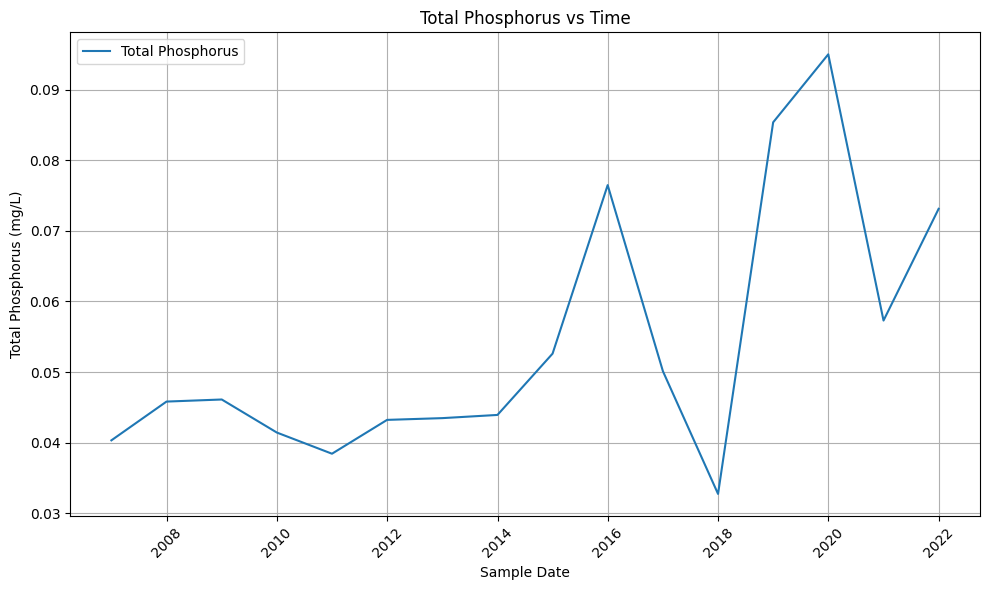

In [20]:
# Plotting Total Phosphorus vs time
plt.figure(figsize=(10, 6))
plt.plot(resampled_df['Sample Date'], resampled_df['Total Phosphorus'], label='Total Phosphorus')
plt.xlabel('Sample Date')
plt.ylabel('Total Phosphorus (mg/L)')
plt.title('Total Phosphorus vs Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

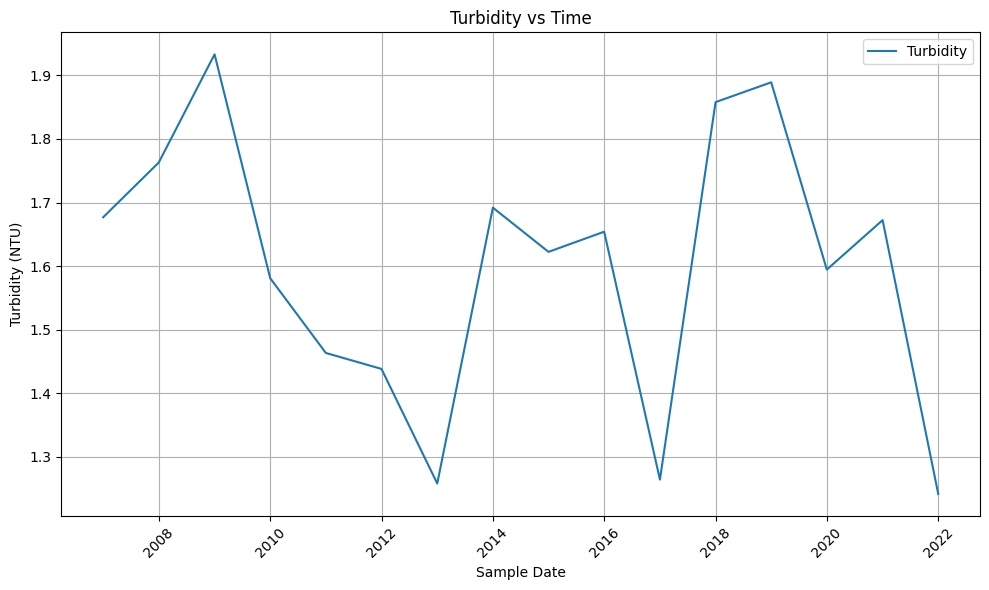

In [21]:
# Plotting Turbidity vs time
plt.figure(figsize=(10, 6))
plt.plot(resampled_df['Sample Date'], resampled_df['Turbidity'], label='Turbidity')
plt.xlabel('Sample Date')
plt.ylabel('Turbidity (NTU)')
plt.title('Turbidity vs Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

### Normalizing the Dataset and plot all parameters on a single graph

In [22]:
# Select columns to normalize
cols_to_normalize = ["Chlorophyll A", "Copper", "Dissolved Oxygen", "Salinity", 
                     "Specific Conductance", "Total Nitrogen", "Total Phosphorus", "Turbidity"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
sorted_df[cols_to_normalize] = scaler.fit_transform(sorted_df[cols_to_normalize].values)

# Print the dataframe
sorted_df

,Location,Site #,Chlorophyll A,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity
Sample Date,,,,,,,,,,
2012-01-30,#1 HILLSBORO CANAL US 1,1.0,0.028394,NaN,0.094639,0.342541,0.091230,0.143141,0.281407,0.073913
2016-02-29,#1 HILLSBORO CANAL US 1,1.0,0.036253,NaN,0.110984,0.004282,0.001455,NaN,0.242462,0.082609
2009-03-02,#1 HILLSBORO CANAL US 1,1.0,0.049754,NaN,0.100360,0.403315,0.105513,0.234592,NaN,0.104348
2017-03-06,#1 HILLSBORO CANAL US 1,1.0,0.091468,NaN,0.061131,0.337017,0.089122,NaN,NaN,0.086957
2019-03-06,#1 HILLSBORO CANAL US 1,1.0,0.078067,NaN,0.095946,0.234807,0.057044,0.254553,0.344221,0.169565
...,...,...,...,...,...,...,...,...,...,...
2020-12-16,#129 Taft Street,129.0,0.028998,NaN,0.061785,0.037431,0.011643,0.405010,0.231156,0.023913
2021-03-03,#129 Taft Street,129.0,0.054389,NaN,0.067833,0.126657,0.036673,0.429423,0.283920,0.036957
2021-08-23,#129 Taft Street,129.0,0.266484,NaN,0.120464,0.126657,0.034332,0.281511,0.278894,0.069565


In [23]:
# Select columns from the 4th column onwards
columns_to_resample = sorted_df.columns[2:]

# Resample each column separately and take means on a yearly basis
resampled_data = {}
for column in columns_to_resample:
    resampled_data[column] = sorted_df[column].resample('Y').mean()

# Convert the dictionary of resampled data to a DataFrame
resampled_df_norm = pd.DataFrame(resampled_data)

# Re-adding the timestamp column to the dataframe
resampled_df_norm["Sample Date"] = resampled_df_norm.index

# Print the resampled Dataframe
resampled_df_norm

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_28955/1515795315.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled_data[column] = sorted_df[column].resample('Y').mean()


,Chlorophyll A,Copper,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity,Sample Date
Sample Date,,,,,,,,,
2006-12-31,0.080252,0.148632,0.090316,0.150539,0.040467,0.476220,0.235325,0.072903,2006-12-31
2007-12-31,0.058504,0.138602,0.087908,0.180606,0.048041,0.438570,0.242227,0.076650,2007-12-31
2008-12-31,0.072922,0.143003,0.083375,0.159133,0.042690,0.472928,0.242598,0.084047,2008-12-31
2009-12-31,0.068030,0.121974,0.074270,0.147010,0.039466,0.403274,0.236710,0.068736,2009-12-31
2010-12-31,0.052889,0.139675,0.075817,0.122351,0.033373,0.399938,0.232942,0.063624,2010-12-31
2011-12-31,0.061057,0.148038,0.086327,0.193013,0.051182,0.364959,0.238967,0.062535,2011-12-31
2012-12-31,0.045595,0.383369,0.082965,0.177129,0.046917,0.354673,0.239281,0.054699,2012-12-31
2013-12-31,0.056723,0.312212,0.072562,0.131968,0.034721,0.411973,0.239849,0.073561,2013-12-31
2014-12-31,0.061638,NaN,0.079006,0.127407,0.046001,0.500916,0.250765,0.070537,2014-12-31


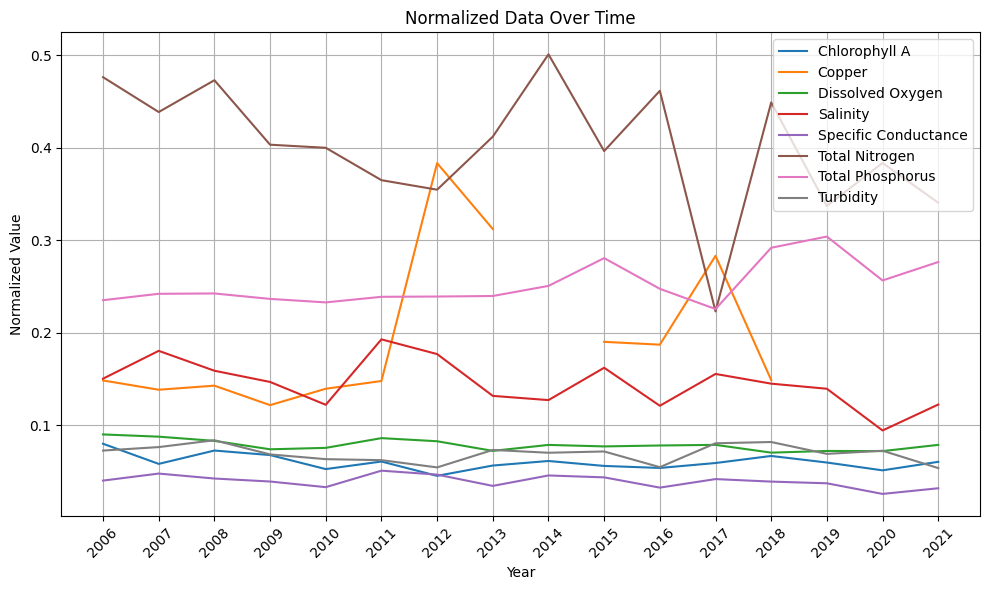

In [24]:
# Drop 'Sample Date' column
resampled_df_norm.drop('Sample Date', axis=1, inplace=True)

# Convert index to datetime
resampled_df_norm.index = pd.to_datetime(resampled_df_norm.index)

# Plot
plt.figure(figsize=(10, 6))

for column in resampled_df_norm.columns:
    plt.plot(resampled_df_norm.index.year, resampled_df_norm[column], label=column)

plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized Data Over Time')
plt.legend()
plt.grid(True)
plt.xticks(resampled_df_norm.index.year, rotation=45)  # Set x-axis ticks to be the years
plt.tight_layout()
plt.show()

### Time Series Analysis

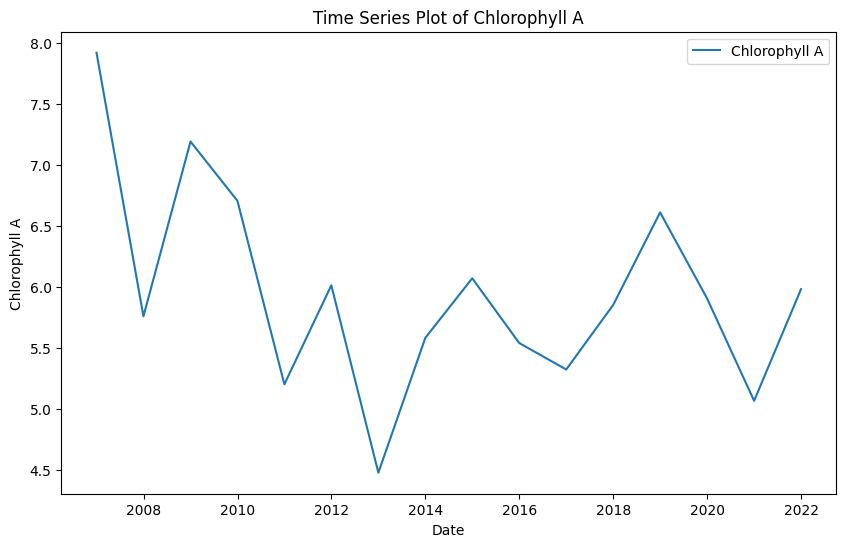

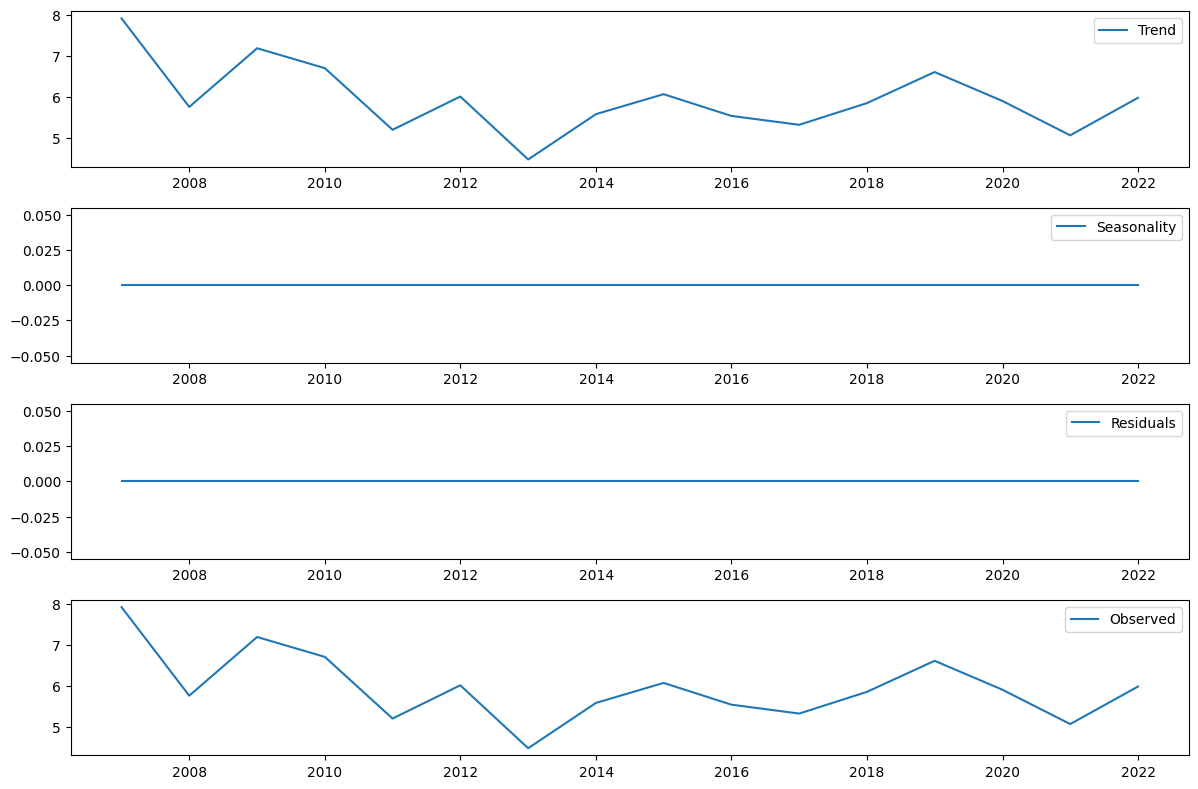

In [25]:
# # Convert 'Sample Date' column to datetime format
# resampled_df['Sample Date'] = pd.to_datetime(resampled_df['Sample Date'])

# # Set 'Sample Date' column as the index
# resampled_df.set_index('Sample Date', inplace=True)

# Select the variable for time series analysis (e.g., Chlorophyll A)
ts_variable = 'Chlorophyll A'

# Plot the time series resampled_df
plt.figure(figsize=(10, 6))
plt.plot(resampled_df.index, resampled_df[ts_variable], label=ts_variable)
plt.title('Time Series Plot of {}'.format(ts_variable))
plt.xlabel('Date')
plt.ylabel(ts_variable)
plt.legend()
plt.show()

# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(resampled_df[ts_variable], model='additive')

# Plot the decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(resampled_df.index, decomposition.trend, label='Trend')
plt.legend()

plt.subplot(412)
plt.plot(resampled_df.index, decomposition.seasonal, label='Seasonality')
plt.legend()

plt.subplot(413)
plt.plot(resampled_df.index, decomposition.resid, label='Residuals')
plt.legend()

plt.subplot(414)
plt.plot(resampled_df.index, decomposition.observed, label='Observed')
plt.legend()

plt.tight_layout()
plt.show()